In [1]:
import pickle
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

(0.0, 1.0)

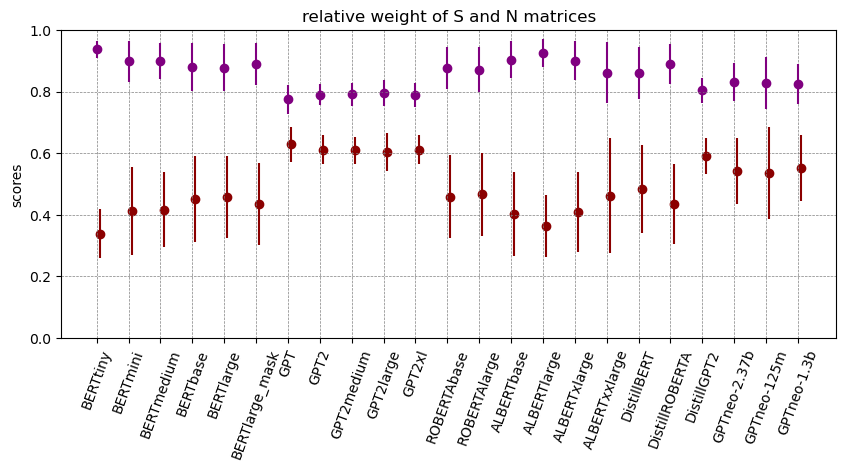

In [8]:
"""
Visualization of the symmetry and anti-symmetry scores across layers and heads
"""

with open('../data/fig_SNmodels/models.pkl', 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-2].flatten() for key in list(models.keys())]
NList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(10,4))

for i, model in enumerate(SList):

    plt.scatter(i*np.ones(SList[i].size),SList[i].flatten(),color='purple',alpha=.001)
    plt.scatter(i,SList[i].flatten().mean(),color='purple')
    plt.errorbar(i,SList[i].flatten().mean(),
                SList[i].flatten().std(),
                color='purple')
    plt.scatter((i+.1)*np.ones(NList[i].size),NList[i].flatten(),color='darkred',alpha=.001)
    plt.scatter(i+.1,NList[i].flatten().mean(),color='darkred')
    plt.errorbar(i+.1,NList[i].flatten().mean(),
                NList[i].flatten().std(),
                color='darkred')
    
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('relative weight of S and N matrices')
plt.ylabel('scores')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=70)
plt.ylim(0,1)